In [1]:
# Make a list of values
values = [2, 4, 5, -1, 0, 10, 8, 9]
# Compute the mean of the values
values_mean = sum(values) / len(values)
# Find the difference between each of the values and the mean by subtracting the mean from each value.
differences = [i - values_mean for i in values]
# This equals 0.  If you'd like, try changing the values around to verify that it still equals 0.
print(sum(differences))

# We can use the median function from numpy to find the median.
# The median is the "middle" value in a set of values. If we sort the values in order, it's the one in the center (or the average of the two in the center if there are an even number of items in the set).
# You'll see that the differences from the median don't always add up to 0.  You might want to play around with this and think about why that is.
from numpy import median

values_median = median(values)

values_median = [i - values_median for i in values]

median_difference_sum = sum(values_median)
median_difference_sum

0.0


1.0

### Variance
Let's look at variance in the data. Variance tells us how concentrated or "spread out" the data is around the mean.
Mathemically, this looks like this:

```
σ**2 = ∑(xi - x_mean)/n
variance
```

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# We've already loaded the NBA data into the nba_stats variable.
# Find the mean value of the column.

nba_stats = pd.read_csv('nba_2013.csv')
pf_mean = nba_stats["pf"].mean()
# Initialize variance at zero.
variance = 0
# Loop through each item in the "pf" column.
for p in nba_stats["pf"]:
    # Calculate the difference between the mean and the value.
    difference = p - pf_mean
    # Square the difference. This ensures that the result isn't negative.
    # If we didn't square the difference, the total variance would be zero.
    # ** in python means "raise whatever comes before this to the power of whatever number is after this."
    square_difference = difference ** 2
    # Add the difference to the total.
    variance += square_difference
# Average the total to find the final variance.
variance = variance / len(nba_stats["pf"])
variance

mean_pts = nba_stats['pts'].mean()

variance = 0
for pts in nba_stats['pts']:
    diff = pts - mean_pts
    variance += (diff ** 2)
 
point_variance = variance / len(nba_stats['pts'])

point_variance

220836.99585496247

In [4]:
# You may be wondering why multiplication and division are on the same level.
# It doesn't matter whether we do the multiplication or division first; the answer here will always be the same.
# In this case, we need to think of division as multiplication by a fraction. Otherwise, we'll be dividing more than we want to.
# Create a formula
a = 5 * 5 / 2
print(a)
# Multiply by 1/2 instead of dividing by 2. The result is the same (2/2 == 2 * 1/2).
a_subbed = 5 * 5 * 1/2
a_mul_first = 25 * 1/2
a_div_first = 5 * 2.5
print(a_mul_first == a_div_first)

# The same is true for subtraction and addition.
# In this case, we need to convert subtraction into adding a negative number. If we don't we'll end up subtracting more than we expect.
b = 10 - 8 + 5
# Add -8 instead of subtracting 8.
b_subbed = 10 + -8 + 5
b_sub_first = 2 + 5
b_add_first = 10 + -3
print(b_sub_first == b_add_first)

c = 10 * 2 + 5
d = 1.5 - 1 / 2 * 2
c
d

12.5
True
True


0.5

### Standard deviation
Standard deviation is the most common way to refer to the distance between data points and the mean. It's a very useful concept and a great way to measure the density of a data set.

```
σ = (∑(xi - x_mean)/n)**(1/2)
std
```

In [6]:
def std_dev_calc(col_name):
    col_mean = nba_stats[col_name].mean()
    variance = 0
    for c in nba_stats[col_name]:
        c_diff = c - col_mean
        variance += (c_diff ** 2)
        
    variance = variance / len(nba_stats[col_name])
    
    return variance ** (1/2)

mp_dev = std_dev_calc('mp')
print(mp_dev)

ast_dev = std_dev_calc('ast')
print(ast_dev)

896.32565278
130.883290708


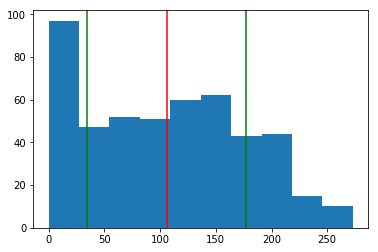

121    0.212473057275
141    0.49331818107
269    2.29072697336


In [14]:
import matplotlib.pyplot as plt

plt.hist(nba_stats["pf"])
mean = nba_stats["pf"].mean()
plt.axvline(mean, color="r")
# We can calculate standard deviation by using the std() method on a pandas series.
std_dev = nba_stats["pf"].std()
# Plot a line one standard deviation below the mean.
plt.axvline(mean - std_dev, color="g")
# Plot a line one standard deviation above the mean.
plt.axvline(mean + std_dev, color="g")

# We can see how many of the data points fall within one standard deviation of the mean.
# The more that fall into this range, the more dense the data is.
plt.show()

# We can calculate how many standard deviations a data point is from the mean by doing some subtraction and division.
# First, we find the total distance by subtracting the mean.
total_distance = nba_stats["pf"][0] - mean
# Then we divide by standard deviation to find how many standard deviations away the point is.
standard_deviation_distance = total_distance / std_dev

point_10 = nba_stats["pf"][9]
point_100 = nba_stats["pf"][99]

point_10_std = (point_10 - mean) / std_dev ## Calculates how many std you are away from mean
point_10_std
print(str(point_10) + "    " + str(point_10_std))

point_100_std = (point_100 - mean) / std_dev
print(str(point_100) + "    " + str(point_100_std))

p = nba_stats["pf"][201]
p_std = (p - mean) / std_dev
print(str(p) + "    " + str(p_std))

### Normal distribution
The normal distribution is a special kind of distribution. You might recognize it more commonly as a bell curve.

The normal distribution is found in a variety of natural phenomena. If we made a histogram of the heights of everyone on the planet, for example, it would be more or less a normal distribution.

We can generate a normal distribution by using a probability density function.

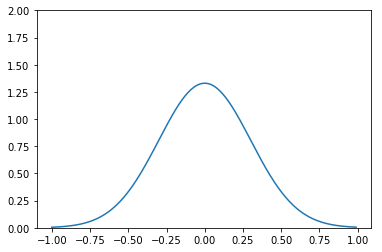

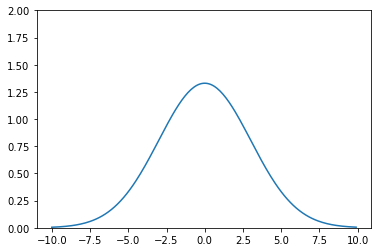

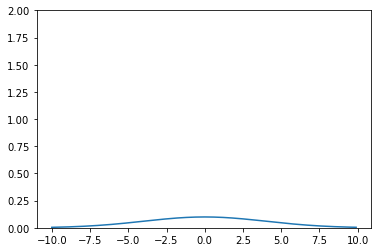

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# The norm module has a pdf function (pdf stands for probability density function)
from scipy.stats import norm

# The arange function generates a numpy vector
# The vector below will start at -1, and go up to, but not including 1
# It will proceed in "steps" of .01.  So the first element will be -1, the second -.99, the third -.98, all the way up to .99.
points = np.arange(-1, 1, 0.01)

# The norm.pdf function will take the points vector and convert it into a probability vector
# Each element in the vector will correspond to the normal distribution (earlier elements and later element smaller, peak in the center)
# The distribution will be centered on 0, and will have a standard devation of .3
probabilities = norm.pdf(points, 0, .3)

# Plot the points values on the x-axis and the corresponding probabilities on the y-axis
# See the bell curve?
plt.plot(points, probabilities)
plt.ylim(0,2)
plt.show()

points = np.arange(-10, 10, 0.1)
probabilites = norm.pdf(points, 0, 2)

plt.plot(points, probabilities)
plt.ylim(0,2)
plt.show()

probabilites_4 = norm.pdf(points, 0, 4)

plt.plot(points, probabilites_4)
plt.ylim(0,2)
plt.show()


In [26]:
# Housefly wing lengths in millimeters
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]

from scipy.stats import norm
import numpy as np
wing_std = np.std(wing_lengths)
print("std:" + str(wing_std))
wing_mean = np.mean(wing_lengths)
print("mean:" + str(wing_mean))

wing_stds = [ ((w-wing_mean)/wing_std) for w in wing_lengths]
wing_stds

def count_in_std(std):
    count_std = 0
    for s in wing_stds:
        if abs(s) < std:
            count_std += 1
    return count_std / len(wing_stds)

within_one_percentage = count_in_std(1)
print("one_std_perct:" + str(within_one_percentage))

within_two_percentage = count_in_std(2)
print("two_std_perct:" + str(within_two_percentage))

within_three_percentage = count_in_std(3)
print("three_std_perct:" + str(within_three_percentage))


std:3.9
mean:45.5
one_std_perct:0.68
two_std_perct:0.96
three_std_perct:1.0


### Correlations

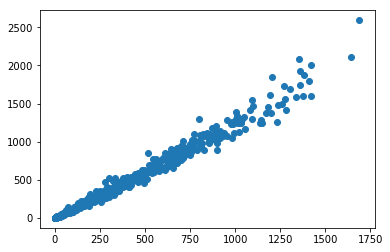

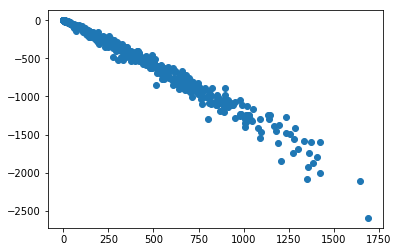

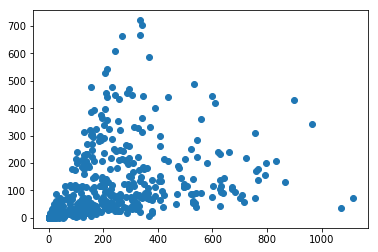

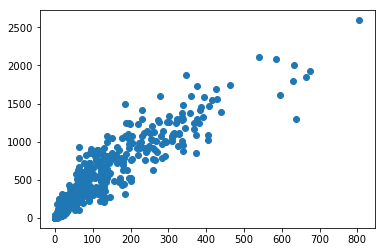

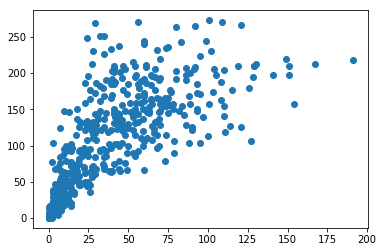

In [27]:
import matplotlib.pyplot as plt

# Plot field goals attempted (number of shots someone takes in a season) vs. point scored in a season.
# Field goals attempted is on the x-axis, and points is on the y-axis.
# As you can tell, they are very strongly correlated. The plot is close to a straight line.
# The plot also slopes upward, which means that as field goal attempts go up, so do points.
# That means that the plot is positively correlated.
plt.scatter(nba_stats["fga"], nba_stats["pts"])
plt.show()

# If we make points negative (so the people who scored the most points now score the least, because 3000 becomes -3000), we can change the direction of the correlation.
# Field goals are negatively correlated with our new "negative" points column -- the more free throws you attempt, the less negative points you score.
# We can see this because the correlation line slopes downward.
plt.scatter(nba_stats["fga"], -nba_stats["pts"])
plt.show()

# Now, we can plot total rebounds (number of times someone got the ball back for their team after someone shot) vs total assists (number of times someone helped another person score).
# These are uncorrelated, so you don't see the same nice line as you see with the plot above.
plt.scatter(nba_stats["trb"], nba_stats["ast"])
plt.show()

plt.scatter(nba_stats['fta'], nba_stats['pts'])
plt.show()

plt.scatter(nba_stats['stl'], nba_stats['pf'])
plt.show()

In [29]:
from scipy.stats.stats import pearsonr

# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(nba_stats["fga"], nba_stats["pts"])
# As we can see, this is a very high positive r value - it's close to 1.
print(r)
print(p_value)
print("")

# These two columns are much less correlated.
r, p_value = pearsonr(nba_stats["trb"], nba_stats["ast"])
# We get a much lower, but still positive, r value.
print(r)
print(p_value)
print("")

r_fta_pts, p_value = pearsonr(nba_stats['fta'], nba_stats['pts'])
print(r_fta_pts)
print(p_value)
print("")

r_stl_pf, p_value = pearsonr(nba_stats['stl'], nba_stats['pf'])
print(r_stl_pf)
print(p_value)
print("")

0.989211400652
0.0

0.369861731248
4.86349955052e-17

0.918978538402
1.00712869586e-195

0.737628216749
9.84633922191e-84



### Covariance

In [32]:
# We've already loaded the nba_stats variable.

def calc_covariance(col1, col2):
    mean_col1 = nba_stats[col1].mean()
    
    mean_col2 = nba_stats[col2].mean()
    
    mul_cols = (nba_stats[col1] - mean_col1) * (nba_stats[col2]- mean_col2)
    sum_cols = sum(mul_cols)
    
    return sum_cols/len(nba_stats[col1])

cov_fta_pts = calc_covariance('fta', 'pts')
print(cov_fta_pts)

cov_stl_pf = calc_covariance('stl', 'pf')
print(cov_stl_pf)


56618.4139807
1823.35484805


### Covariance Coeffecient
```cov(x,y)/(std(x)*std(y))``` 

or can also be known as correlation

In [37]:
from numpy import cov
# We've already loaded the nba_stats variable for you.

cov_fta_blk = cov(nba_stats["fta"], nba_stats["pts"])[0,1]

r_fta_blk = cov_fta_blk/(nba_stats["fta"].std() *  nba_stats["pts"].std())
print(r_fta_blk)

cov_ast_stl = cov(nba_stats["stl"], nba_stats["pf"])[0,1]

r_ast_stl = cov_ast_stl/(nba_stats["stl"].std() *  nba_stats["pf"].std())
print(r_ast_stl)


0.918978538402
0.737628216749
